In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# load the data
df = pd.read_csv("./Data/engines2_data_cleaned_no_outliers.csv")
df

,eposition,flight_phase,eng_install_date,cycles,egt_probe_average,fuel_flw,corrected_fan_spd,core_spd,zpn12p,vib_n1_#1_bearing,vib_n2_#1_bearing,vib_n2_turbine_frame,eng_type,eng_number,flight_datetime_c,date,time,flight_cycle,RUL
0,1,TAKEOFF,19-01-20 22:00,37.0,810.5125,1520.0,82.9875,103.19,79.21,0.1000,0.275,0.700,2,1,2020-02-29 07:09:00,2020-02-29,07:09:00,1,4428
1,1,CLIMB,19-01-20 22:00,38.0,851.5125,5373.0,NaN,105.20,89.15,0.1267,0.375,0.500,2,1,2020-02-29 07:10:00,2020-02-29,07:10:00,1,4428
2,1,CRUISE,19-01-20 22:00,38.0,754.8250,2431.0,NaN,102.94,83.01,0.1133,0.425,0.550,2,1,2020-02-29 08:41:00,2020-02-29,08:41:00,1,4428
3,1,TAKEOFF,19-01-20 22:00,38.0,876.5125,1476.0,82.9875,106.00,84.16,0.0600,0.225,0.600,2,1,2020-02-29 11:33:00,2020-02-29,11:33:00,2,4427
4,1,CLIMB,19-01-20 22:00,39.0,870.5875,5239.0,NaN,106.23,89.70,0.1267,0.150,0.450,2,1,2020-02-29 11:33:00,2020-02-29,11:33:00,2,4427
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88789,1,TAKEOFF,24-04-24 23:00,4464.0,935.6000,1885.0,82.1850,106.98,84.63,0.0867,0.600,0.825,2,7,2024-09-10 08:09:00,2024-09-10,08:09:00,3974,1
88790,1,CRUISE,24-04-24 23:00,4465.0,753.3125,2557.0,86.3213,100.93,81.53,0.1800,0.050,0.125,2,7,2024-09-10 10:04:00,2024-09-10,10:04:00,3974,1
88791,1,TAKEOFF,24-04-24 23:00,4465.0,905.3500,2982.0,79.7197,105.61,81.93,0.1400,0.375,0.575,2,7,2024-09-10 14:28:00,2024-09-10,14:28:00,3975,0
88792,1,CLIMB,24-04-24 23:00,4466.0,912.9125,5378.0,NaN,105.70,90.07,0.1933,0.300,0.450,2,7,2024-09-10 14:28:00,2024-09-10,14:28:00,3975,0


In [2]:
df['eng_number'].unique()

array([1, 2, 3, 4, 5, 6, 7])

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88794 entries, 0 to 88793
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   eposition             88794 non-null  int64  
 1   flight_phase          88794 non-null  object 
 2   eng_install_date      88794 non-null  object 
 3   cycles                88794 non-null  float64
 4   egt_probe_average     88794 non-null  float64
 5   fuel_flw              88794 non-null  float64
 6   corrected_fan_spd     59757 non-null  float64
 7   core_spd              88794 non-null  float64
 8   zpn12p                88794 non-null  float64
 9   vib_n1_#1_bearing     88794 non-null  float64
 10  vib_n2_#1_bearing     88794 non-null  float64
 11  vib_n2_turbine_frame  88794 non-null  float64
 12  eng_type              88794 non-null  int64  
 13  eng_number            88794 non-null  int64  
 14  flight_datetime_c     88794 non-null  object 
 15  date               

In [4]:

df['flight_datetime_c'] = pd.to_datetime(df['flight_datetime_c'])

# Extract cyclical time features
df['hour'] = df['flight_datetime_c'].dt.hour
df['dayofweek'] = df['flight_datetime_c'].dt.dayofweek
df['month'] = df['flight_datetime_c'].dt.month
df['day'] = df['flight_datetime_c'].dt.day

# Encode as sin/cos
df['hour_sin'] = np.sin(2 * np.pi * df['hour'] / 24)
df['hour_cos'] = np.cos(2 * np.pi * df['hour'] / 24)
df['dayofweek_sin'] = np.sin(2 * np.pi * df['dayofweek'] / 7)
df['dayofweek_cos'] = np.cos(2 * np.pi * df['dayofweek'] / 7)
df['month_sin'] = np.sin(2 * np.pi * df['month'] / 12)
df['month_cos'] = np.cos(2 * np.pi * df['month'] / 12)
df['day_sin'] = np.sin(2 * np.pi * df['day'] / 31)
df['day_cos'] = np.cos(2 * np.pi * df['day'] / 31)

df.drop(columns=['hour', 'month', 'dayofweek', 'day'], inplace=True)
df

,eposition,flight_phase,eng_install_date,cycles,egt_probe_average,fuel_flw,corrected_fan_spd,core_spd,zpn12p,vib_n1_#1_bearing,...,flight_cycle,RUL,hour_sin,hour_cos,dayofweek_sin,dayofweek_cos,month_sin,month_cos,day_sin,day_cos
0,1,TAKEOFF,19-01-20 22:00,37.0,810.5125,1520.0,82.9875,103.19,79.21,0.1000,...,1,4428,0.965926,-0.258819,-0.974928,-0.222521,0.866025,5.000000e-01,-0.394356,0.918958
1,1,CLIMB,19-01-20 22:00,38.0,851.5125,5373.0,NaN,105.20,89.15,0.1267,...,1,4428,0.965926,-0.258819,-0.974928,-0.222521,0.866025,5.000000e-01,-0.394356,0.918958
2,1,CRUISE,19-01-20 22:00,38.0,754.8250,2431.0,NaN,102.94,83.01,0.1133,...,1,4428,0.866025,-0.500000,-0.974928,-0.222521,0.866025,5.000000e-01,-0.394356,0.918958
3,1,TAKEOFF,19-01-20 22:00,38.0,876.5125,1476.0,82.9875,106.00,84.16,0.0600,...,2,4427,0.258819,-0.965926,-0.974928,-0.222521,0.866025,5.000000e-01,-0.394356,0.918958
4,1,CLIMB,19-01-20 22:00,39.0,870.5875,5239.0,NaN,106.23,89.70,0.1267,...,2,4427,0.258819,-0.965926,-0.974928,-0.222521,0.866025,5.000000e-01,-0.394356,0.918958
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88789,1,TAKEOFF,24-04-24 23:00,4464.0,935.6000,1885.0,82.1850,106.98,84.63,0.0867,...,3974,1,0.866025,-0.500000,0.781831,0.623490,-1.000000,-1.836970e-16,0.897805,-0.440394
88790,1,CRUISE,24-04-24 23:00,4465.0,753.3125,2557.0,86.3213,100.93,81.53,0.1800,...,3974,1,0.500000,-0.866025,0.781831,0.623490,-1.000000,-1.836970e-16,0.897805,-0.440394
88791,1,TAKEOFF,24-04-24 23:00,4465.0,905.3500,2982.0,79.7197,105.61,81.93,0.1400,...,3975,0,-0.500000,-0.866025,0.781831,0.623490,-1.000000,-1.836970e-16,0.897805,-0.440394
88792,1,CLIMB,24-04-24 23:00,4466.0,912.9125,5378.0,NaN,105.70,90.07,0.1933,...,3975,0,-0.500000,-0.866025,0.781831,0.623490,-1.000000,-1.836970e-16,0.897805,-0.440394


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88794 entries, 0 to 88793
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   eposition             88794 non-null  int64         
 1   flight_phase          88794 non-null  object        
 2   eng_install_date      88794 non-null  object        
 3   cycles                88794 non-null  float64       
 4   egt_probe_average     88794 non-null  float64       
 5   fuel_flw              88794 non-null  float64       
 6   corrected_fan_spd     59757 non-null  float64       
 7   core_spd              88794 non-null  float64       
 8   zpn12p                88794 non-null  float64       
 9   vib_n1_#1_bearing     88794 non-null  float64       
 10  vib_n2_#1_bearing     88794 non-null  float64       
 11  vib_n2_turbine_frame  88794 non-null  float64       
 12  eng_type              88794 non-null  int64         
 13  eng_number      

In [6]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import GroupShuffleSplit
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.losses import Huber
from tensorflow.keras.metrics import MeanSquaredError
from tensorflow.keras import regularizers

# --- One-hot encode flight_phase ---
df = pd.get_dummies(df, columns=["flight_phase"])
#Define features
sensor_cols = ['flight_cycle','eposition','egt_probe_average', 'fuel_flw', 'core_spd', 'zpn12p',
               'vib_n1_#1_bearing', 'vib_n2_#1_bearing', 'vib_n2_turbine_frame',
               'hour_sin', 'hour_cos', 'month_sin', 'month_cos',
               'dayofweek_sin','dayofweek_cos','day_sin','day_cos']+ \
              [col for col in df.columns if col.startswith("flight_phase_")]

# --- Split data by engine to prevent leakage ---
split = GroupShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
train_idx, temp_idx = next(split.split(df, groups=df['eng_number']))
df_train = df.iloc[train_idx].copy()
df_temp = df.iloc[temp_idx].copy()

split_val_test = GroupShuffleSplit(n_splits=1, test_size=0.5, random_state=42)
val_idx, test_idx = next(split_val_test.split(df_temp, groups=df_temp['eng_number']))
df_val = df_temp.iloc[val_idx].copy()
df_test = df_temp.iloc[test_idx].copy()

# --- Scale features ---
scaler = MinMaxScaler()
df_train[sensor_cols] = scaler.fit_transform(df_train[sensor_cols])
df_val[sensor_cols] = scaler.transform(df_val[sensor_cols])
df_test[sensor_cols] = scaler.transform(df_test[sensor_cols])

# --- Scale RUL ---
rul_scaler = MinMaxScaler()
df_train['RUL'] = rul_scaler.fit_transform(df_train[['RUL']])
df_val['RUL'] = rul_scaler.transform(df_val[['RUL']])
df_test['RUL'] = rul_scaler.transform(df_test[['RUL']])

# --- Create LSTM windows ---
def create_lstm_windows(data, window_size=8, stride=1, add_noise=False, noise_std=0.01):
    X, y = [], []
    for engine_id in data['eng_number'].unique():
        engine_df = data[data['eng_number'] == engine_id].reset_index(drop=True)
        for i in range(0, len(engine_df) - window_size, stride):
            window = engine_df.loc[i:i+window_size-1, sensor_cols].values.astype(np.float32)

            # ➕ Add Gaussian noise (if enabled)
            if add_noise:
                noise = np.random.normal(loc=0.0, scale=noise_std, size=window.shape)
                window += noise

            label = engine_df.loc[i + window_size - 1, 'RUL']
            X.append(window)
            y.append(label)
    return np.array(X), np.array(y)



# More aggressive data generation with small stride and noise
X_train, y_train = create_lstm_windows(df_train, window_size=10, stride=1, add_noise=True, noise_std=0.02)

# Keep validation/test untouched for honest evaluation
X_val, y_val = create_lstm_windows(df_val, window_size=10, stride=1)
X_test, y_test = create_lstm_windows(df_test, window_size=10, stride=1)

# --- Build Regularized LSTM Model ---
model = Sequential()
model.add(LSTM(32, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2]),
               kernel_regularizer=regularizers.l2(0.0015)))
model.add(Dropout(0.1))
model.add(LSTM(64, return_sequences=False, kernel_regularizer=regularizers.l2(0.003)))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.0015)))
model.add(Dense(1))

model.compile(optimizer='adam', loss=Huber(delta=0.1), metrics=[MeanSquaredError()])

# --- Callbacks ---
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
checkpoint_cb = ModelCheckpoint("best_lstm2_model.keras",
                                monitor='val_loss',
                                save_best_only=True,
                                mode='min',
                                verbose=1)

# --- Train ---
history = model.fit(X_train, y_train,
                    epochs=50,
                    batch_size=32,
                    validation_data=(X_val, y_val),
                    callbacks=[early_stop, checkpoint_cb],
                    verbose=1)

# --- Load best model ---
best_model = load_model("best_lstm2_model.keras")

# --- Evaluate: Validation ---
y_pred_val = best_model.predict(X_val).flatten()
y_pred_val = rul_scaler.inverse_transform(y_pred_val.reshape(-1, 1)).flatten()
y_val = rul_scaler.inverse_transform(y_val.reshape(-1, 1)).flatten()

mae_val = mean_absolute_error(y_val, y_pred_val)
r2_val = r2_score(y_val, y_pred_val)

print(f"\n✅ Validation MAE: {mae_val:.2f}")
print(f"✅ Validation R² Score: {r2_val:.3f}")

# --- Evaluate: Test ---
y_pred_test = best_model.predict(X_test).flatten()
y_pred_test = rul_scaler.inverse_transform(y_pred_test.reshape(-1, 1)).flatten()
y_test = rul_scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()

mae_test = mean_absolute_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

print(f"\n✅ Test MAE: {mae_test:.2f}")
print(f"✅ Test R² Score: {r2_test:.3f}")




Epoch 1/50


C:\Users\marwa\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1930/1933 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0429 - mean_squared_error: 0.0110
Epoch 1: val_loss improved from inf to 0.00306, saving model to best_lstm2_model.keras
1933/1933 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - loss: 0.0428 - mean_squared_error: 0.0110 - val_loss: 0.0031 - val_mean_squared_error: 0.0047
Epoch 2/50
1931/1933 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0016 - mean_squared_error: 0.0020
Epoch 2: val_loss improved from 0.00306 to 0.00186, saving model to best_lstm2_model.keras
1933/1933 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 0.0016 - mean_squared_error: 0.0020 - val_loss: 0.0019 - val_mean_squared_error: 0.0029
Epoch 3/50
1930/1933 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0013 - mean_squared_error: 0.0019
Epoch 3: val_loss did not improve from 0.00186
1933/1933 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - loss: 0.0013 - mean_squared_error: 0.0019 - val_loss: 0.0040 - val_mean_squared_error: 0.0075
Epoch 4/50
1930/1933 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0013 - mea

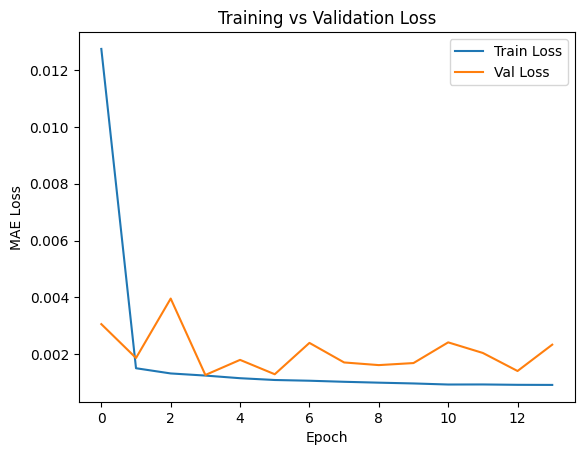

In [7]:


# --- Optional: Plot training history ---
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('MAE Loss')
plt.legend()
plt.show()